
## Bokeh

In [15]:
#Bokeh :interactive plot 
#3개의 모듈 불러오기 
#figure - plot 생성하기 위한 모듈
#show- plot 보여줘야함. 


from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.resources import INLINE


In [16]:


#결과물 보기 위해선 이걸 꼭 써야함. 

In [17]:
plot = figure()

show(plot)

In [18]:
>>> from bokeh.core.validation import silence
>>> from bokeh.core.validation.warnings import EMPTY_LAYOUT
>>> silence(EMPTY_LAYOUT, True)



{1002}

In [19]:
#width, height = 사이즈 조절
#tools = tool에 뭘 표현할건지
#pan-왔다갔다 할 수 있는거
#reset- 처음상태로
#save - png형태로
#plot.(명령어) - circle, x,y값 리스트 형태로 지정해주기

plot = figure(plot_width=400, plot_height=400, tools='pan, reset, save')
plot.circle([1, 2, 3, 4], [1, 2, 3, 4])
show(plot)


In [20]:
plot = figure(plot_width=400, plot_height=400)
plot.x([1, 2, 3, 4], [1, 2, 3, 4], color='red', size=10)
show(plot)

#색상과 size 설정 가능. 
#Markers: asterisk, circle, circle_cross, circle_x, 
#cross, diamond, diamond_cross, inverted_triangle, square, 
#square_cross, square_x, triangle, x 

In [21]:
from bokeh.sampledata.iris import flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
#title, x_axis_label, y_axis_label

plot = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
              title='Petal Length vs. Sepal Length')
plot.circle(flowers['petal_length'], flowers['sepal_length'], color='gold', size=5)
show(plot)

In [23]:
import pandas as pd
import numpy as np


In [24]:

gapminder = pd.read_csv('https://raw.githubusercontent.com/statkwon/ESC-Visualization/master/3rd_Week/gapminder.csv')

In [25]:
gapminder = gapminder[gapminder['Country']=='France']
gapminder = gapminder.reset_index(drop=True)

In [26]:
#Lineplot

plot = figure(x_axis_label='Year', y_axis_label='Life Expectancy', title='Life Expectancy in France',
              plot_width=700, plot_height=400)
plot.circle(gapminder['Year'], gapminder['life'], size=5)
plot.line(gapminder['Year'], gapminder['life'], width=3)
show(plot)

In [27]:
#Numpy 활용해야함. 

plot = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Length', y_axis_label='Probability',
             title='Histogram')
hist, edges = np.histogram(flowers['sepal_length'], density=True, bins=10)
plot.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white", color='orange')

#quad =hist, bottom 에 0, 위치 지정


show(plot)


In [28]:
#Box selection
#tools 에 box_select, reset 넣어주면 됨.
#자동으로 select할때 색깔 구분 됨. 
#세세한 selection_color='red', nonselection_fill_alpha=0.3, nonselection_fill_color='grey'

plot = figure(plot_width=400, plot_height=400, tools='box_select, reset',
              x_axis_label='Petal Length', y_axis_label='Sepal Length', title='Petal Length vs. Sepal Length')
plot.circle(flowers['petal_length'], flowers['sepal_length'], size=5,
           selection_color='red', nonselection_fill_alpha=0.3, nonselection_fill_color='grey')
show(plot)

In [29]:
from bokeh.models import HoverTool


In [30]:
# tools=[hover]설정. 

hover = HoverTool(tooltips=None, mode='vline')
plot = figure(plot_width=400, plot_height=400, tools=[hover],
              x_axis_label='Petal Length', y_axis_label='Sepal Length', title='Petal Length vs. Sepal Length')
plot.circle(flowers['petal_length'], flowers['sepal_length'], size=5,
            hover_fill_color='firebrick', hover_alpha=0.5, hover_line_color='white')
show(plot)


In [31]:
#columndatasource - 컬럼 명만 지정해주고 source= source 표현하면 됨. 

from bokeh.models import ColumnDataSource

In [32]:
#description 띄우는 것. 
#tools=[hover] 사용해야함. 
#source=source

source = ColumnDataSource(flowers)
hover = HoverTool(tooltips=[('Species', '@species'), ('Petal Length', '@petal_length'),
                            ('Sepal Length', '@sepal_length')]) #label 이름 마음대로 바꾸기, @은 df에 있는 컬럼명 다시 지정
plot = figure(plot_width=400, plot_height=400, tools=[hover],
              x_axis_label='Petal Length', y_axis_label='Sepal Length', title='Petal Length vs. Sepal Length')
plot.circle('petal_length', 'sepal_length', source=source, size=5)
show(plot)

In [33]:
from bokeh.models import CategoricalColorMapper

In [34]:
#color mapping

#어떻게 컬러를 나누고 싶은지 factors=['setosa', 'virginica', 'versicolor']
#palette=['red', 'green', 'blue']
#color={'field':'species', 'transform':mapper}, source=source)
#dictionary 형태로. #아까 만들어주었던 mapper변수. 

plot = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
             title='Petal Length vs. Sepal Length')
source = ColumnDataSource(flowers)
mapper = CategoricalColorMapper(factors=['setosa', 'virginica', 'versicolor'], palette=['red', 'green', 'blue'])
plot.circle('petal_length', 'sepal_length', color={'field':'species', 'transform':mapper}, source=source)
show(plot)

In [21]:
#Legend 추가

plot = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
             title='Petal Length vs. Sepal Length')
source = ColumnDataSource(flowers)
mapper = CategoricalColorMapper(factors=['setosa', 'virginica', 'versicolor'], palette=['red', 'green', 'blue'])
plot.circle('petal_length', 'sepal_length', color={'field':'species', 'transform':mapper},
            legend_field='species', source=source)
plot.legend.location = 'top_left'
show(plot)

#background 색 바꾸고 싶으면 plot.legend.background_fill_color = 'lightgray'



#여러개 그리면서 plot 배치하기 



In [22]:
from bokeh.layouts import row


In [23]:
source = ColumnDataSource(flowers)

#p1,p2



p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

layout = row(p1, p2)
show(layout)

In [24]:
from bokeh.layouts import column


In [25]:

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

layout = column(p1, p2)
show(layout)

In [26]:
#layout = column(row(p1, p2), row(p3, p4))


source = ColumnDataSource(flowers)

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Sepal Length',
           title='Sepal Width vs. Sepal Length')
p3.circle('sepal_width', 'sepal_length', source=source, color='green')

p4 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Petal Width',
           title='Sepal Width vs. Petal Width')
p4.circle('sepal_width', 'petal_width', source=source, color='gold')

layout = column(row(p1, p2), row(p3, p4))
show(layout)

In [27]:
from bokeh.layouts import gridplot

In [28]:
source = ColumnDataSource(flowers)

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Sepal Length',
           title='Sepal Width vs. Sepal Length')
p3.circle('sepal_width', 'sepal_length', source=source, color='green')

p4 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Petal Width',
           title='Sepal Width vs. Petal Width')
p4.circle('sepal_width', 'petal_width', source=source, color='gold')

layout = gridplot([[p1, p2], [p3, p4]])

show(layout)

#layout = gridplot([[p1, p2], [p3, p4]])

#툴바 하나로 통일돠는게 위와의 차별점

In [29]:
#축 동시에 움직일 수 있게 하는것. 

source = ColumnDataSource(flowers)

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Length', y_axis_label='Sepal Width',
           title='Sepal Length vs. Sepal Width')
p3.circle('sepal_length', 'sepal_width', source=source, color='green')

p4 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Petal Width',
           title='Sepal Width vs. Petal Width')
p4.circle('sepal_width', 'petal_width', source=source, color='gold')


p2.x_range = p1.x_range
p3.y_range = p1.y_range
p4.x_range = p3.x_range
p4.y_range = p2.y_range

#x축이 서로 같다고 설정해주기.

layout = gridplot([[p1, p2], [p3, p4]])
show(layout)

In [30]:
#각각의 box selection

source = ColumnDataSource(flowers)

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length', tools='box_select, reset')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width', tools='box_select, reset')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Length', y_axis_label='Sepal Width',
           title='Sepal Length vs. Sepal Width', tools='box_select, reset')
p3.circle('sepal_length', 'sepal_width', source=source, color='green')

p4 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Petal Width',
           title='Sepal Width vs. Petal Width', tools='box_select, reset')
p4.circle('sepal_width', 'petal_width', source=source, color='gold')

layout = gridplot([[p1, p2], [p3, p4]])
show(layout)

In [31]:
#tab 기능. 

from bokeh.models.widgets import Panel, Tabs


In [32]:
source = ColumnDataSource(flowers)

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Sepal Length',
           title='Petal Length vs. Sepal Length')
p1.circle('petal_length', 'sepal_length', source=source, color='red')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Petal Length', y_axis_label='Petal Width',
           title='Petal Length vs. Petal Width')
p2.circle('petal_length', 'petal_width', source=source, color='blue')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Length', y_axis_label='Sepal Width',
           title='Sepal Length vs. Sepal Width')
p3.circle('sepal_length', 'sepal_width', source=source, color='green')

p4 = figure(plot_width=400, plot_height=400, x_axis_label='Sepal Width', y_axis_label='Petal Width',
           title='Sepal Width vs. Petal Width')
p4.circle('sepal_width', 'petal_width', source=source, color='gold')

#tab 각각 만든다음에, child로 위치 지정하고, 리스트 형태로 넣어준다음에 show. 

tab1 = Panel(child=p1, title='Tab 1')
tab2 = Panel(child=p2, title='Tab 2')
tab3 = Panel(child=row(p3, p4), title='Tab 3')

tabs = Tabs(tabs=[tab1, tab2, tab3])
show(tabs)

In [33]:
temp = pd.read_csv('https://raw.githubusercontent.com/statkwon/ESC-Visualization/master/3rd_Week/temp.csv')

In [48]:
from bokeh.io import push_notebook
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets.embed import embed_minimal_html

In [49]:
source = ColumnDataSource(temp)

p = figure()
p.circle('min_temp','max_temp',source=source)

#어떤 변수를 우리가 줄 것인가. 
#변수가 바뀌었을때 그래프도 같이 업데이트 되어야함. 

def update(v1,v2):
    new_min = temp[(v1<temp['date']) & (temp['date']<=v2)]['min_temp']
    new_max = temp[(v1<temp['date']) & (temp['date']<=v2)]['max_temp']
    source.data = {'min_temp': new_min, 'max_temp':new_max}
    push_notebook() #notebook으로 밀어주기
    
show(p, notebook_handle=True) #우리가 바꾸는대로 바뀌도록 조절해줌.
interact(update, v1=widgets.IntSlider(min=1,max=31,step=1,value=1), 
         #widget.Intslider - 어떤 input 값을 주냐에 따라서 달라짐. step=몇칸, value=초깃값
        v2=widgets.IntSlider(min=1,max=31,step=1,value=10))



#바꿔줄 변수를 설정하고, 어떻게 업데이트 되는지 보기. 

<function __main__.update(v1, v2)>

In [36]:
source = ColumnDataSource(temp) #temp불러오기

cp = ['red','blue','green'] #plot의 색 바꿔주고, #넓이랑 높이 임의로 지정해주기.
@interact(c1=cp, c2=cp, c3=cp, w=(300,500), h=(400,600))

#@interact 안에 내가 조정하고 싶은 변수를 넣어줌. 여기서는 색깔인 셈.
#골뱅이 안에 input type 지정해주면 됨. input type 이 리스트 타입으로 들어가게 되면, 
#밑에 업데이트 하는 플롯 짜주면 됨. 

def color(c1, c2, c3, w, h):
    p = figure(plot_width=w, plot_height=h)
    p.circle(x='date', y='min_temp', color=c1,source=source)
    p.line(x='date', y='avg_temp', color=c2,source=source)
    p.circle(x='date', y='max_temp', color=c3,source=source)
    show(p)
    
    
#원래 선언되어있었던 것을 그냥 간단하게 바꿀 수 있는것. 

In [37]:
x = np.linspace(-5,5,100)
@interact(mu=[0,1,2,3],sigma=(1,5))

def update(mu, sigma):
    p = figure(plot_width=800, plot_height=400)
    new_y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x-mu)**2 / (2 * sigma **2))
    p.line(x,new_y, color="#2222aa", line_width=3)
    show(p)
    
    
#정규분포를 그리는건데, Mu = 파라미터, 시그마=1-5까지의 값.
#업데이트하는 코드 
#p.line = x,new_y 넣어서 업데이트 시켜줌. 

In [38]:
from scipy.stats import gamma

In [39]:
x = np.linspace(0,20,100)
@interact(shape=(1,5), scale=widgets.Play(value=1,min=1,max=50,step=1,interval=500,description="Press play"))

#다양한 위젯형태 - widget.play 이런식으로 진행.

def update(shape,scale):
    p = figure(plot_width=800,plot_height=400)
    new_y = gamma(shape, 0, scale).pdf(x)
    p.line(x,new_y, color="#2222aa", line_width=2)
    show(p)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
movie = pd.read_csv('https://raw.githubusercontent.com/statkwon/ESC-Visualization/master/2nd_Week/movies.csv')
gnr = list(movie['genre'].unique())

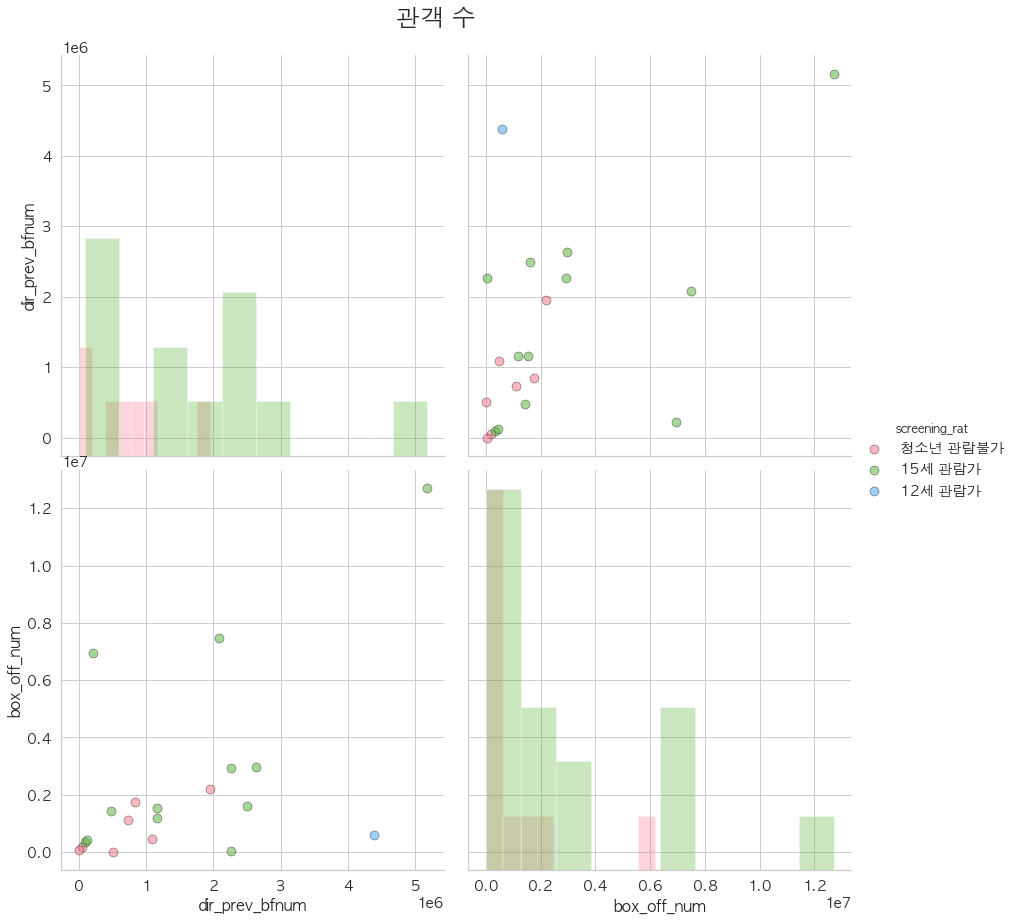

In [42]:
#장르별로 비교할 수 있는. 

sns.set(font='AppleGothic', font_scale=1.3, style='whitegrid')
@interact(genre = gnr)

def update(genre):
    movie2 = movie[movie['genre']==genre]  #장르 열에서 장르가 같을때만 모아줌. 
    
    #movie2.
    
    a = sns.pairplot(movie2[['dir_prev_bfnum', 'box_off_num', 'screening_rat']], hue='screening_rat',
                diag_kind='hist', plot_kws = {'alpha':0.5, 's':80, 'edgecolor':'k'},
                diag_kws = {'alpha':0.3}, palette='husl', height=6)
    a.fig.suptitle('관객 수', x=0.43, y=1.05, fontsize=24)
    plt.show()

In [47]:
@interact(name=widgets.Text(value='내부자들'))

#고정값을 넣어줬던 자리에 변수 새로 넣어주면 됨. 

def update(name):
    movie2 = movie[movie['title'].str.contains(name)]
    return(movie2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.0,3,382,3,2084844
